In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Load your JSON file
with open('merged.json', 'r') as file:
    data = json.load(file)

# Iterate over all years and periods to ensure each start date has the same length
max_periods = max(len(periods) for periods in data.values())

for start_date, periods in data.items():
    for i in range(1, max_periods + 1):
        period_key = f"Period-{i}"
        if not any(period.get(period_key) for period in periods):
            periods.append({period_key: None})

# Create DataFrame
df = pd.DataFrame(data)

# DataFrame umformen und in numerisches Format umwandeln
df_transposed = df.transpose()
df_numerical = df_transposed.applymap(lambda x: list(x.values())[0])


In [ ]:
# 6 years

# Nur die ausgewählten Quartale anzeigen
selected_quarters = [3, 7, 11, 15, 19, 23]
df_selected_quarters = df_numerical[selected_quarters]

# Heatmap erstellen
plt.figure(figsize=(16, 18))
sns.heatmap(df_selected_quarters, annot=True, cmap="RdYlGn", cbar_kws={'label': 'Rendite'})

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Quartal")
plt.ylabel("Investitionsstartdatum")
plt.title("Jährliche Portfoliorenditen")

# Ticks anpassen
plt.xticks(ticks=range(1, len(selected_quarters) + 1), labels=[f"Jahr {i}" for i in range(1, len(selected_quarters) + 1)])


plt.savefig('C:\\Users\\lucys\\OneDrive\\Desktop\\ws2324\\ba-thesis\\6year_returns_triangle.png')

# Plot anzeigen
plt.show()


In [ ]:
# 3 years


# Nur die ausgewählten Quartale anzeigen
selected_quarters = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
df_selected_quarters = df_numerical[selected_quarters]

# Heatmap erstellen
plt.figure(figsize=(16, 18))
sns.heatmap(df_selected_quarters, annot=True, cmap="RdYlGn", cbar_kws={'label': 'Rendite'})


# Ticks anpassen
plt.xticks(ticks=range(1, len(selected_quarters) + 1), labels=[f"Quartal {i}" for i in range(1, len(selected_quarters) + 1)])

#plt.savefig('C:\\Users\\lucys\\OneDrive\\Desktop\\ws2324\\ba-thesis\\3year_returns_triangle.png')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Periode")
plt.ylabel("Investitionsstartdatum")
plt.title("Renditen")

plt.savefig('C:\\Users\\lucys\\OneDrive\\Desktop\\ws2324\\ba-thesis\\3year_returns_triangle.png')


# Plot anzeigen
plt.show()

In [9]:
portfolio_filepath = 'C:\\Users\\lucys\\graham_number\\portfolio_pipeline\\merged_portfolio.json'

# Load your JSON file
with open(portfolio_filepath, 'r') as f:
    portfolios = json.load(f)



print(portfolios)


{'2000-03-31': {'CCU': 1974.5937103653, 'AIG': 166.46762931842028, 'SVU': 73.93982705621245, 'C': 68.26390649065456, 'JCI': 57.134877867620084, 'ODP': 54.991641687677955, 'UIS': 45.713421379846665, 'CSR': 24.207659253756425, 'SNV': 13.8050464545537, 'CAR': 8.949197116915446, 'XRX': 7.5319946827952435, 'SCI': 5.948399396335573, 'RRD': 5.489980966525398, 'BIG': 3.12569307999461, 'EP': 1.8146310932318273, 'CMS': 0.16355735605544552}, '2000-06-30': {'CCU': 776.5207332624868, 'AIG': 169.52087872556945, 'JCI': 85.44839881515784, 'C': 72.64308023030082, 'SVU': 69.32036496062452, 'ODP': 42.96838746269309, 'CAR': 30.695397653769355, 'UIS': 28.344620464428395, 'CSR': 20.59670722557343, 'NC': 16.144268799636258, 'SNV': 15.484857693825848, 'RRD': 7.163401830469457, 'DDS': 3.764635314694628, 'XRX': 3.7106055620845027, 'OI': 3.111652341457102, 'EP': 2.824596736698346, 'BC': 2.05356483760497, 'RTN': 1.268915405279575, 'ETR': 1.146412252167849, 'CTB': 0.8004004834812477}, '2000-09-30': {'CCU': 369.457

In [10]:
# restructure portfolio dictionary
portfolios_wo_gn = {}
for key, value in portfolios.items():
    portfolios_wo_gn[key] = [k for k in value.keys()]


print(portfolios_wo_gn)

{'2000-03-31': ['CCU', 'AIG', 'SVU', 'C', 'JCI', 'ODP', 'UIS', 'CSR', 'SNV', 'CAR', 'XRX', 'SCI', 'RRD', 'BIG', 'EP', 'CMS'], '2000-06-30': ['CCU', 'AIG', 'JCI', 'C', 'SVU', 'ODP', 'CAR', 'UIS', 'CSR', 'NC', 'SNV', 'RRD', 'DDS', 'XRX', 'OI', 'EP', 'BC', 'RTN', 'ETR', 'CTB'], '2000-09-30': ['CCU', 'AIG', 'JCI', 'C', 'SVU', 'ODP', 'CAR', 'UIS', 'OI', 'RRD', 'SNV', 'XRX', 'EIX', 'EP', 'THC', 'CCK', 'MSI', 'LPX', 'KSU'], '2000-12-31': ['CCU', 'AIG', 'VIAV', 'C', 'JCI', 'ODP', 'SVU', 'WEN', 'PCG', 'EIX', 'UIS', 'CCK', 'CAR', 'BIG', 'SNV', 'X', 'GE', 'RRD', 'GRA', 'MSI', 'HAS', 'EP', 'OI', 'LPX'], '2001-03-31': ['CCU', 'BVSN', 'VIAV', 'NBR', 'AIG', 'C', 'SVU', 'CAR', 'JCI', 'UIS', 'ODP', 'MSI', 'XRX', 'DDS', 'SANM', 'SNV', 'EIX', 'LPX', 'PCG', 'EP', 'DD', 'GE', 'BIG'], '2001-06-30': ['BVSN', 'VIAV', 'NBR', 'CCU', 'AIG', 'C', 'JCI', 'SVU', 'CAR', 'MSI', 'ODP', 'XRX', 'UIS', 'FTR', 'GLW', 'PCG', 'SNV', 'GE', 'EP', 'ASH', 'DUK'], '2001-09-30': ['BVSN', 'CCU', 'NBR', 'JCI', 'C', 'VIAV', 'AIG', '

In [12]:
portfolio_lenghts = []
for key, value in portfolios_wo_gn.items():
    length = len(value)
    portfolio_lenghts.append(length)


print(portfolio_lenghts)
mean = sum(portfolio_lenghts) / len(portfolio_lenghts)
print(mean)

[16, 20, 19, 24, 23, 21, 24, 27, 25, 29, 30, 30, 30, 29, 29, 27, 27, 27, 30, 30, 26, 30, 23, 25, 27, 29, 30, 30, 26, 28, 26, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 29, 20, 27, 30, 30, 27, 30, 30, 29, 21, 17, 16, 13, 10, 10, 11, 20, 19, 15, 26, 27, 19, 20, 21, 22, 9, 8, 8, 27, 9, 7, 6, 24, 9, 11, 11, 14, 30, 30, 30, 29, 14, 9, 10, 14, 11, 20, 25, 24]
22.869565217391305


In [22]:
mean_margin_of_safeties = {}
for key, value in portfolios.items():
    margin_of_safeties = []
    for margin in value.values():
        margin_of_safeties.append(margin)
    mean_margin = sum(margin_of_safeties) / len(margin_of_safeties)
    mean_margin_of_safeties[key] = mean_margin


print(mean_margin_of_safeties)

{'2000-03-31': 157.0088233478685, '2000-06-30': 67.67659400290019, '2000-09-30': 49.88411891602512, '2000-12-31': 133.17199077107298, '2001-03-31': 247.0443154881651, '2001-06-30': 166.90092986693085, '2001-09-30': 127.16340714792209, '2001-12-31': 131.68547749976523, '2002-03-31': 237.08034536938348, '2002-06-30': 441.2082382441596, '2002-09-30': 94.51637568378688, '2002-12-31': 104.45994012411853, '2003-03-31': 141.85297744477796, '2003-06-30': 61.83784875705971, '2003-09-30': 78.05670800343175, '2003-12-31': 133.5375533878692, '2004-03-31': 165.71331270226372, '2004-06-30': 147.06696864831068, '2004-09-30': 91.99453958952965, '2004-12-31': 133.07420469280873, '2005-03-31': 245.58056270316894, '2005-06-30': 162.031058419425, '2005-09-30': 141.3632862557971, '2005-12-31': 159.4438615553381, '2006-03-31': 221.3669097604718, '2006-06-30': 319.83859411215514, '2006-09-30': 376.86522658738863, '2006-12-31': 343.53364021872466, '2007-03-31': 1255898.6398428022, '2007-06-30': 404.4173717264

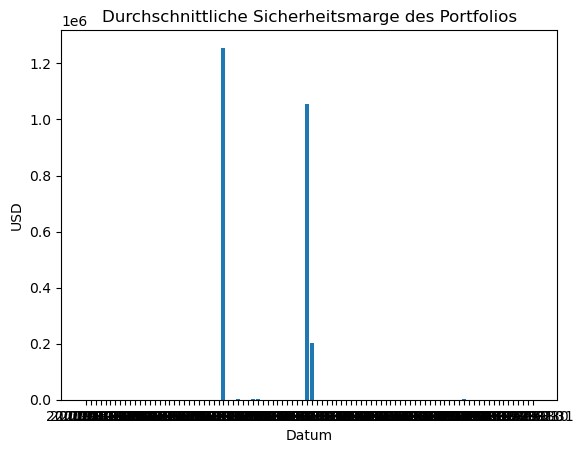

In [31]:
import matplotlib.pyplot as plt

# Daten für die Visualisierung vorbereiten
dates = list(mean_margin_of_safeties.keys())
margins = [mean_margin_of_safeties[date] for date in dates]

# Balkendiagramm erstellen
plt.bar(dates, margins)
plt.xlabel('Datum')
plt.ylabel('USD')
plt.title('Durchschnittliche Sicherheitsmarge des Portfolios')

# Diagramm anzeigen
plt.show()


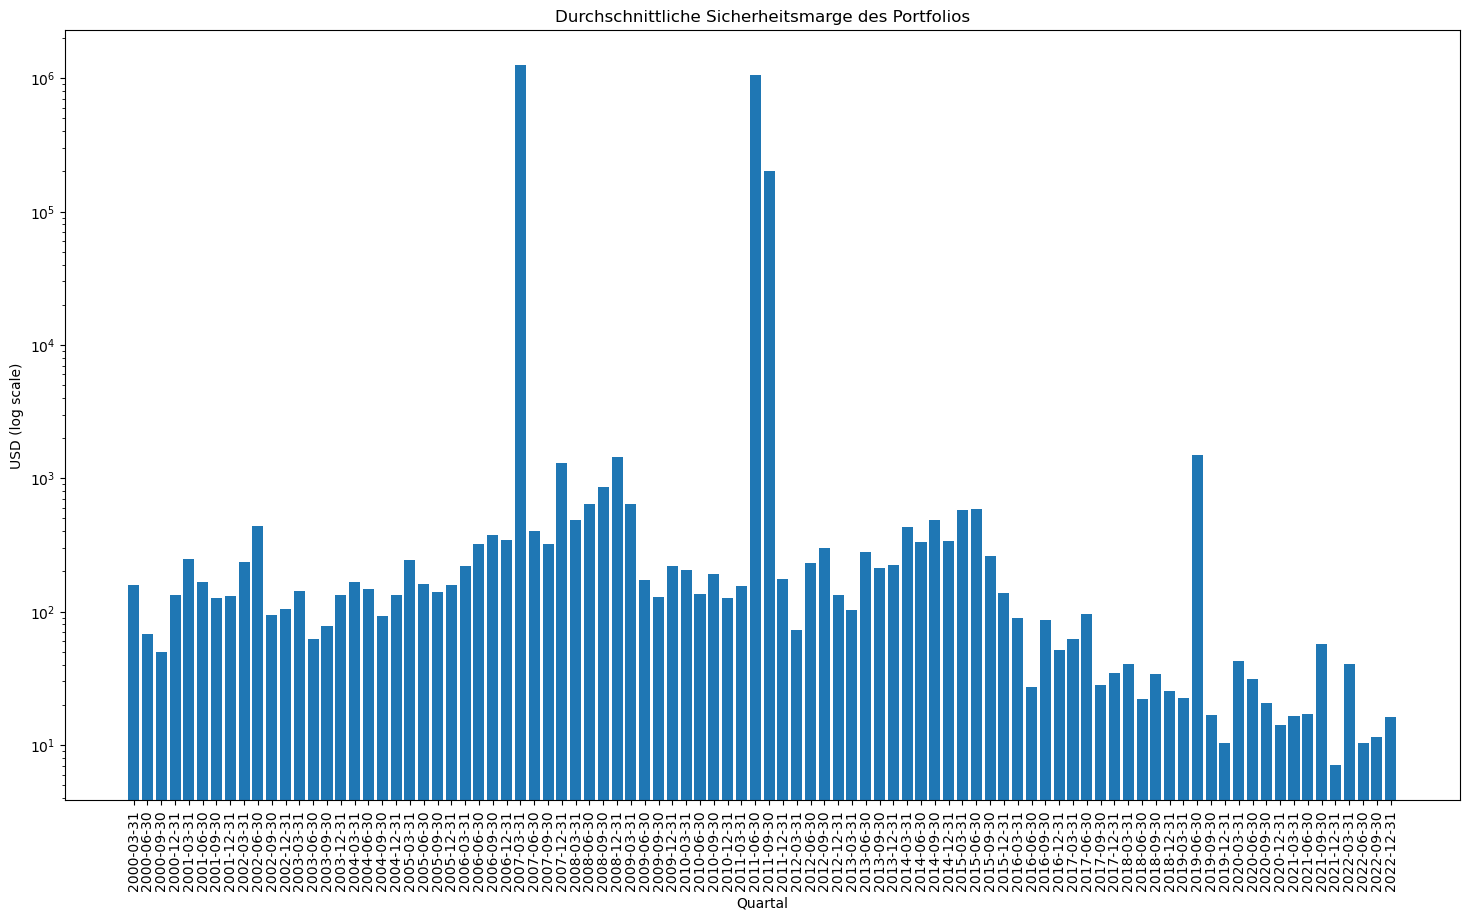

In [44]:
import matplotlib.pyplot as plt

# Daten für die Visualisierung vorbereiten
dates = list(mean_margin_of_safeties.keys())
margins = [mean_margin_of_safeties[date] for date in dates]

plt.figure(figsize=(18, 10))

# Balkendiagramm mit logarithmischer y-Achse erstellen
plt.bar(dates, margins)
plt.yscale('log')  # Logarithmische Skala für die y-Achse
plt.xlabel('Quartal')
plt.xticks(rotation=90)
plt.ylabel('USD (log scale)')
plt.title('Durchschnittliche Sicherheitsmarge des Portfolios')

plt.savefig('C:\\Users\\lucys\\OneDrive\\Desktop\\ws2324\\ba-thesis\\avg_margin_of_safety.png')


# Diagramm anzeigen
plt.show()

